In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
dataset = iris.data
print('dataset shape:',dataset.shape)
labels = iris.target
print('labels shape:',labels.shape)

dataset shape: (150, 4)
labels shape: (150,)


In [3]:
class Kernels():        
    def Polynomial_Kernel(self,vector1,vector2,d):
        k = np.power(np.dot(vector1,vector2),d)
        return k 
        
    def Exp_Kernel(self,vector1,vector2,sigma):
        k = np.exp(np.dot(vector1,vector2)/(sigma*sigma))
        return k  
        
    def Gaussian_Kernel(self,vector1,vector2,sigma):
        k = np.exp(np.sum(np.square(vector1-vector2))/(2*sigma*sigma))
        return k 
    
    def Normalized_Exp_Kernel(self,vector1,vector2,sigma):
        k = np.exp(np.dot(vector1,vector2)/(sigma*sigma))
        k = k / np.sqrt(np.exp(np.sum(np.square(vector1)))*np.exp(np.sum(np.square(vector2))))
        return k  

In [72]:
#KPCA
m = 2
kernel = Kernels()

[length,width] = dataset.shape
Matrix_K = np.zeros((length,length))

for i in range(length):
    for j in range(length):
        Matrix_K[i,j] = kernel.Polynomial_Kernel(dataset[i,:],dataset[j,:],4)
        #Matrix_K[i,j] = kernel.Exp_Kernel(dataset[i,:],dataset[j,:],10)
        #Matrix_K[i,j] = kernel.Gaussian_Kernel(dataset[i,:],dataset[j,:],10)
        #Matrix_K[i,j] = kernel.Normalized_Exp_Kernel(dataset[i,:],dataset[j,:],1)

[eigvals,eigvecs] = np.linalg.eig(Matrix_K)

for i in range(eigvals.size):
        indice = i
        for j in range(eigvals.size):
            if j > i:
                if eigvals[j] > eigvals[indice]:
                    indice = j
                        
        eigvecs[:,i],eigvecs[:,indice] = eigvecs[:,indice],eigvecs[:,i]
            
new_features = Matrix_K @ eigvecs[:,0:m]

<function matplotlib.pyplot.show(*args, **kw)>

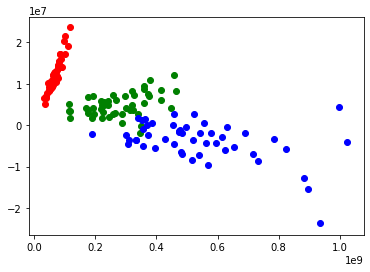

In [73]:
import matplotlib.pyplot as plt

plt.scatter(new_features[:50,0],new_features[:50,1],c='r')
plt.scatter(new_features[50:100,0],new_features[50:100,1],c='g')
plt.scatter(new_features[100:150,0],new_features[100:150,1],c='b')
plt.show